In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from collections import Counter
import warnings
import emoji
import re
warnings.filterwarnings('ignore')   


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
# Read CSV file and print the contents

df = pd.read_csv('test_ai_posts_historical.csv')
print(df.head()) # Read CSV file and print the contents

# Make into dataframe
df = pd.DataFrame(df)
print(df.head())

   keyword                author  \
0  chatgpt  profcpbl.bsky.social   
1       ai     alvinashcraft.com   
2  chatgpt  urologia.bsky.social   
3       ai  urologia.bsky.social   
4       ai      john.whites.site   

                                                text  \
0  I've done pretty well defending myself against...   
1  What Does ChatGPT Mean for New Software Develo...   
2  You can subscribe at\nhttps://openai.com/blog/...   
3  🧠💯💥\nI just tried the #chatGPT asking some ran...   
4  A5: In the coming years, it is likely that AI ...   

                 created_at  \
0  2024-11-25T03:00:03.351Z   
1  2024-11-22T00:38:05.262Z   
2  2024-11-27T13:27:22.167Z   
3  2024-11-27T13:17:47.557Z   
4  2024-12-06T12:27:23.653Z   

                                                 uri  like_count  \
0  at://did:plc:izkupspivve6uyzyvbcldoav/app.bsky...           0   
1  at://did:plc:tdj5ie3dprhi242wsd7ykk7k/app.bsky...           0   
2  at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...   

In [3]:
# Make into dataframe
df = pd.DataFrame(df)
print(df.head())
print(df.columns)


   keyword                author  \
0  chatgpt  profcpbl.bsky.social   
1       ai     alvinashcraft.com   
2  chatgpt  urologia.bsky.social   
3       ai  urologia.bsky.social   
4       ai      john.whites.site   

                                                text  \
0  I've done pretty well defending myself against...   
1  What Does ChatGPT Mean for New Software Develo...   
2  You can subscribe at\nhttps://openai.com/blog/...   
3  🧠💯💥\nI just tried the #chatGPT asking some ran...   
4  A5: In the coming years, it is likely that AI ...   

                 created_at  \
0  2024-11-25T03:00:03.351Z   
1  2024-11-22T00:38:05.262Z   
2  2024-11-27T13:27:22.167Z   
3  2024-11-27T13:17:47.557Z   
4  2024-12-06T12:27:23.653Z   

                                                 uri  like_count  \
0  at://did:plc:izkupspivve6uyzyvbcldoav/app.bsky...           0   
1  at://did:plc:tdj5ie3dprhi242wsd7ykk7k/app.bsky...           0   
2  at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...   

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983828 entries, 0 to 983827
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   keyword              983828 non-null  object
 1   author               983828 non-null  object
 2   text                 982025 non-null  object
 3   created_at           983828 non-null  object
 4   uri                  983828 non-null  object
 5   like_count           983828 non-null  int64 
 6   repost_count         983828 non-null  int64 
 7   reply_count          983828 non-null  int64 
 8   author_display_name  944997 non-null  object
 9   has_embedded_media   983828 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 68.5+ MB
None


In [47]:
# Check for missing values
print(df.isnull().sum())

keyword                    0
author                     0
text                    1803
created_at                 0
uri                        0
like_count                 0
repost_count               0
reply_count                0
author_display_name    38831
has_embedded_media         0
dtype: int64


In [48]:
# Check for duplicates
print(df.duplicated().sum())

0


In [49]:
# Basic NLP Analysis
# - Word count
# - Sentence count
# - Average word length
# - Average sentence length

df.shape
print(df.shape)

# - Word count
def word_count(text):
    # Handle NaN, None, or non-string values
    if pd.isna(text) or not isinstance(text, str):
        return 0
    words = text.split()
    return len(words)

df['word_count'] = df['text'].apply(word_count)
print(df[['text', 'word_count']].head())

# - Sentence count
def sentence_count(text):
    # Handle NaN, None, or non-string values
    if pd.isna(text) or not isinstance(text, str):
        return 0
    sentences = re.split(r'[.!?]+', text)
    return len([s for s in sentences if s.strip()])

df['sentence_count'] = df['text'].apply(sentence_count)
print(df[['text', 'sentence_count']].head())

# - Average word length
def average_word_length(text):
    # Handle NaN, None, or non-string values
    if pd.isna(text) or not isinstance(text, str):
        return 0
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

df['average_word_length'] = df['text'].apply(average_word_length)
print(df[['text', 'average_word_length']].head())

# - Average sentence length
def average_sentence_length(text):
    # Handle NaN, None, or non-string values
    if pd.isna(text) or not isinstance(text, str):
        return 0
    sentences = re.split(r'[.!?]+', text)
    sentences = [s for s in sentences if s.strip()]
    if len(sentences) == 0:
        return 0
    return sum(len(s.split()) for s in sentences) / len(sentences)

df['average_sentence_length'] = df['text'].apply(average_sentence_length)
print(df[['text', 'average_sentence_length']].head())

(983828, 10)
                                                text  word_count
0  I've done pretty well defending myself against...          44
1  What Does ChatGPT Mean for New Software Develo...          15
2  You can subscribe at\nhttps://openai.com/blog/...          10
3  🧠💯💥\nI just tried the #chatGPT asking some ran...          35
4  A5: In the coming years, it is likely that AI ...          34
                                                text  word_count
0  I've done pretty well defending myself against...          44
1  What Does ChatGPT Mean for New Software Develo...          15
2  You can subscribe at\nhttps://openai.com/blog/...          10
3  🧠💯💥\nI just tried the #chatGPT asking some ran...          35
4  A5: In the coming years, it is likely that AI ...          34
                                                text  sentence_count
0  I've done pretty well defending myself against...               3
1  What Does ChatGPT Mean for New Software Develo...               5


In [50]:
#lexical diversity
def lexical_diversity(text):
    # Handle NaN, None, or non-string values
    if pd.isna(text) or not isinstance(text, str):
        return 0
    words = text.split()
    if len(words) == 0:
        return 0
    unique_words = set(words)
    return len(unique_words) / len(words) 

df['lexical_diversity'] = df['text'].apply(lexical_diversity)
print(df[['text', 'lexical_diversity']].head())

# - Vocabulary size (unique words)
def vocabulary_size(text):
    # Handle NaN, None, or non-string values
    if pd.isna(text) or not isinstance(text, str):
        return 0
    words = text.split()
    unique_words = set(words)
    return len(unique_words)

df['vocabulary_size'] = df['text'].apply(vocabulary_size)
print(df[['text', 'vocabulary_size']].head())

# Compare between posts and comments
df['type'] = 'post'  
posts = df[df['type'] == 'post']
comments = df[df['type'] == 'comment']
print("Posts Analysis:")
print(posts[['word_count', 'sentence_count', 'average_word_length', 'average_sentence_length', 'lexical_diversity', 'vocabulary_size']].describe())
print("Comments Analysis:")
print(comments[['word_count', 'sentence_count', 'average_word_length', 'average_sentence_length', 'lexical_diversity', 'vocabulary_size']].describe())

                                                text  lexical_diversity
0  I've done pretty well defending myself against...           1.000000
1  What Does ChatGPT Mean for New Software Develo...           1.000000
2  You can subscribe at\nhttps://openai.com/blog/...           1.000000
3  🧠💯💥\nI just tried the #chatGPT asking some ran...           0.971429
4  A5: In the coming years, it is likely that AI ...           0.911765
                                                text  vocabulary_size
0  I've done pretty well defending myself against...               44
1  What Does ChatGPT Mean for New Software Develo...               15
2  You can subscribe at\nhttps://openai.com/blog/...               10
3  🧠💯💥\nI just tried the #chatGPT asking some ran...               34
4  A5: In the coming years, it is likely that AI ...               31
                                                text  vocabulary_size
0  I've done pretty well defending myself against...               44
1  What 

In [51]:
# Replace missing value with 'Unknown'
df['text'] = df['text'].fillna('Unknown')
df['author_display_name'] = df['author_display_name'].fillna('Unknown')

In [52]:

def clean_text(text):
    if not isinstance(text, str):  # handles NaN or non-string inputs
        return ""
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = emoji.demojize(text)
    text = re.sub(r"@", "", text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)




In [53]:
df.head()

,keyword,author,text,created_at,uri,like_count,repost_count,reply_count,author_display_name,has_embedded_media,word_count,sentence_count,average_word_length,average_sentence_length,lexical_diversity,vocabulary_size,type,cleaned_text
0,chatgpt,profcpbl.bsky.social,I've done pretty well defending myself against...,2024-11-25T03:00:03.351Z,at://did:plc:izkupspivve6uyzyvbcldoav/app.bsky...,0,0,0,C Barrington-Leigh,False,44,3,5.204545,14.666667,1.000000,44,post,I've done pretty well defending myself against...
1,ai,alvinashcraft.com,What Does ChatGPT Mean for New Software Develo...,2024-11-22T00:38:05.262Z,at://did:plc:tdj5ie3dprhi242wsd7ykk7k/app.bsky...,0,0,0,Alvin Ashcraft,True,15,5,10.066667,3.400000,1.000000,15,post,What Does ChatGPT Mean for New Software Develo...
2,chatgpt,urologia.bsky.social,You can subscribe at\nhttps://openai.com/blog/...,2024-11-27T13:27:22.167Z,at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...,0,0,0,Ioannis Goumas Uro,False,10,2,10.600000,5.500000,1.000000,10,post,You can subscribe at\n\n\nMicheleTalso wroclaw...
3,ai,urologia.bsky.social,🧠💯💥\nI just tried the #chatGPT asking some ran...,2024-11-27T13:17:47.557Z,at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...,0,0,1,Ioannis Goumas Uro,True,35,2,6.857143,17.500000,0.971429,34,post,:brain::hundred_points::collision:\nI just tri...
4,ai,john.whites.site,"A5: In the coming years, it is likely that AI ...",2024-12-06T12:27:23.653Z,at://did:plc:eha4zzrxqaezc6rxpni3dkos/app.bsky...,0,0,0,John P White,False,34,2,5.117647,17.000000,0.911765,31,post,"A5: In the coming years, it is likely that AI ..."


In [54]:
# replace all of the whitespace and clean the text into some format we can use sentimental anaylsis

# 1. Lowercase the text
df['cleaned_text'] = df['cleaned_text'].str.lower()

# 2. Replace newline characters (\n) and carriage returns (\r) with a space
df['cleaned_text'] = df['cleaned_text'].str.replace(r'[\n\r]+', ' ', regex=True)

# 3. Replace any remaining extra whitespace (tabs, multiple spaces) with a single space
# The r'\s+' pattern matches one or more whitespace characters
df['cleaned_text'] = df['cleaned_text'].str.replace(r'\s+', ' ', regex=True)

# 4. Remove leading/trailing whitespace
df['cleaned_text'] = df['cleaned_text'].str.strip()

# Display the first few rows to see the result
print(df[['cleaned_text']].head())

                                        cleaned_text
0  i've done pretty well defending myself against...
1  what does chatgpt mean for new software develo...
2  you can subscribe at micheletalso wroclawski_u...
3  :brain::hundred_points::collision: i just trie...
4  a5: in the coming years, it is likely that ai ...


In [56]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# --- 1. Setup: Define Stopwords and Punctuation ---
# Get the standard English stop words from NLTK
stop_words = set(stopwords.words('english'))

# Get all standard punctuation characters
punctuation = string.punctuation

# --- 2. Step 1: Basic Cleaning (Lowercasing & Whitespace) ---
# Assuming 'df' is your DataFrame and 'cleaned_text' is the column
df['cleaned_text'] = df['cleaned_text'].str.lower()
df['cleaned_text'] = df['cleaned_text'].str.replace(r'[\n\r]+', ' ', regex=True)
df['cleaned_text'] = df['cleaned_text'].str.replace(r'\s+', ' ', regex=True)
df['cleaned_text'] = df['cleaned_text'].str.strip()

# --- 3. Step 2: Punctuation and Stopword Removal Function ---

def clean_for_sentiment(text):
    # a) Remove punctuation
    # Replaces any punctuation character with a space
    text = re.sub(f'[{re.escape(punctuation)}]', ' ', text)
    
    # b) Tokenize the text (break into individual words)
    tokens = word_tokenize(text)
    
    # c) Remove Stopwords
    # Keep the word only if it is NOT in the stop_words set and is NOT empty
    filtered_tokens = [word for word in tokens if word not in stop_words and word.strip() != '']
    
    # d) Join the tokens back into a single string
    return ' '.join(filtered_tokens)

# --- 4. Step 3: Apply the cleaning function to the DataFrame column ---
df['sentiment_ready_text'] = df['cleaned_text'].apply(clean_for_sentiment)

# Display the original vs. the new cleaned text
print(df[['cleaned_text', 'sentiment_ready_text']].head())

                                        cleaned_text  \
0  i've done pretty well defending myself against...   
1  what does chatgpt mean for new software develo...   
2  you can subscribe at micheletalso wroclawski_u...   
3  :brain::hundred_points::collision: i just trie...   
4  a5: in the coming years, it is likely that ai ...   

                                sentiment_ready_text  
0  done pretty well defending ecoanxiety acceptin...  
1  chatgpt mean new software developers integerma...  
2  subscribe micheletalso wroclawski uro dongnguy...  
3  brain hundred points collision tried chatgpt a...  
4  a5 coming years likely ai continue play signif...  


In [57]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def get_vader_sentiment(text):
    # Initialize VADER analyzer
    analyzer = SentimentIntensityAnalyzer()
    
    # Get the polarity scores
    vs = analyzer.polarity_scores(text)
    
    # The 'compound' score is a normalized score that is often used for classification
    compound_score = vs['compound']
    
    # Determine the classification
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

text = "This product is absolutely amazing and well worth the price! 😄"
print(f"Text: '{text}'")
print(f"Sentiment: {get_vader_sentiment(text)}")

Text: 'This product is absolutely amazing and well worth the price! 😄'
Sentiment: Positive


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [58]:
# --- 1. Setup ---
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# --- 2. Function to Get the Compound Score ---
def get_sentiment_score(text):
    # Ensure text is treated as a string, handling potential NaN/None values
    if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
        return 0.0  # Assign a neutral score for empty/null values
    
    # Get polarity scores
    vs = analyzer.polarity_scores(text)
    
    # Return the 'compound' score
    # This is a single, normalized metric between -1 (most extreme negative) 
    # and +1 (most extreme positive).
    return vs['compound']

# --- 3. Apply the Function to Create the New Column ---
# Apply the function to the cleaned text column and store the result in 'sentiment_score'
df['sentiment_score'] = df['sentiment_ready_text'].apply(get_sentiment_score)

# Display the new column alongside the cleaned text to verify
print("--- DataFrame Head with New Sentiment Score ---")
print(df[['sentiment_ready_text', 'sentiment_score']].head())

--- DataFrame Head with New Sentiment Score ---
                                sentiment_ready_text  sentiment_score
0  done pretty well defending ecoanxiety acceptin...           0.6249
1  chatgpt mean new software developers integerma...           0.0000
2  subscribe micheletalso wroclawski uro dongnguy...           0.0000
3  brain hundred points collision tried chatgpt a...           0.2023
4  a5 coming years likely ai continue play signif...           0.1779


In [59]:
df.head()

,keyword,author,text,created_at,uri,like_count,repost_count,reply_count,author_display_name,has_embedded_media,word_count,sentence_count,average_word_length,average_sentence_length,lexical_diversity,vocabulary_size,type,cleaned_text,sentiment_ready_text,sentiment_score
0,chatgpt,profcpbl.bsky.social,I've done pretty well defending myself against...,2024-11-25T03:00:03.351Z,at://did:plc:izkupspivve6uyzyvbcldoav/app.bsky...,0,0,0,C Barrington-Leigh,False,44,3,5.204545,14.666667,1.000000,44,post,i've done pretty well defending myself against...,done pretty well defending ecoanxiety acceptin...,0.6249
1,ai,alvinashcraft.com,What Does ChatGPT Mean for New Software Develo...,2024-11-22T00:38:05.262Z,at://did:plc:tdj5ie3dprhi242wsd7ykk7k/app.bsky...,0,0,0,Alvin Ashcraft,True,15,5,10.066667,3.400000,1.000000,15,post,what does chatgpt mean for new software develo...,chatgpt mean new software developers integerma...,0.0000
2,chatgpt,urologia.bsky.social,You can subscribe at\nhttps://openai.com/blog/...,2024-11-27T13:27:22.167Z,at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...,0,0,0,Ioannis Goumas Uro,False,10,2,10.600000,5.500000,1.000000,10,post,you can subscribe at micheletalso wroclawski_u...,subscribe micheletalso wroclawski uro dongnguy...,0.0000
3,ai,urologia.bsky.social,🧠💯💥\nI just tried the #chatGPT asking some ran...,2024-11-27T13:17:47.557Z,at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...,0,0,1,Ioannis Goumas Uro,True,35,2,6.857143,17.500000,0.971429,34,post,:brain::hundred_points::collision: i just trie...,brain hundred points collision tried chatgpt a...,0.2023
4,ai,john.whites.site,"A5: In the coming years, it is likely that AI ...",2024-12-06T12:27:23.653Z,at://did:plc:eha4zzrxqaezc6rxpni3dkos/app.bsky...,0,0,0,John P White,False,34,2,5.117647,17.000000,0.911765,31,post,"a5: in the coming years, it is likely that ai ...",a5 coming years likely ai continue play signif...,0.1779


In [60]:
df['sentiment_score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 983828 entries, 0 to 983827
Series name: sentiment_score
Non-Null Count   Dtype  
--------------   -----  
983828 non-null  float64
dtypes: float64(1)
memory usage: 7.5 MB


In [61]:
df['sentiment_score'].describe()

count    983828.000000
mean          0.116499
std           0.407132
min          -0.999900
25%           0.000000
50%           0.000000
75%           0.421500
max           0.999800
Name: sentiment_score, dtype: float64

In [62]:
# - Average sentiment score
df['sentiment_score'].mean()

np.float64(0.1164989629284794)

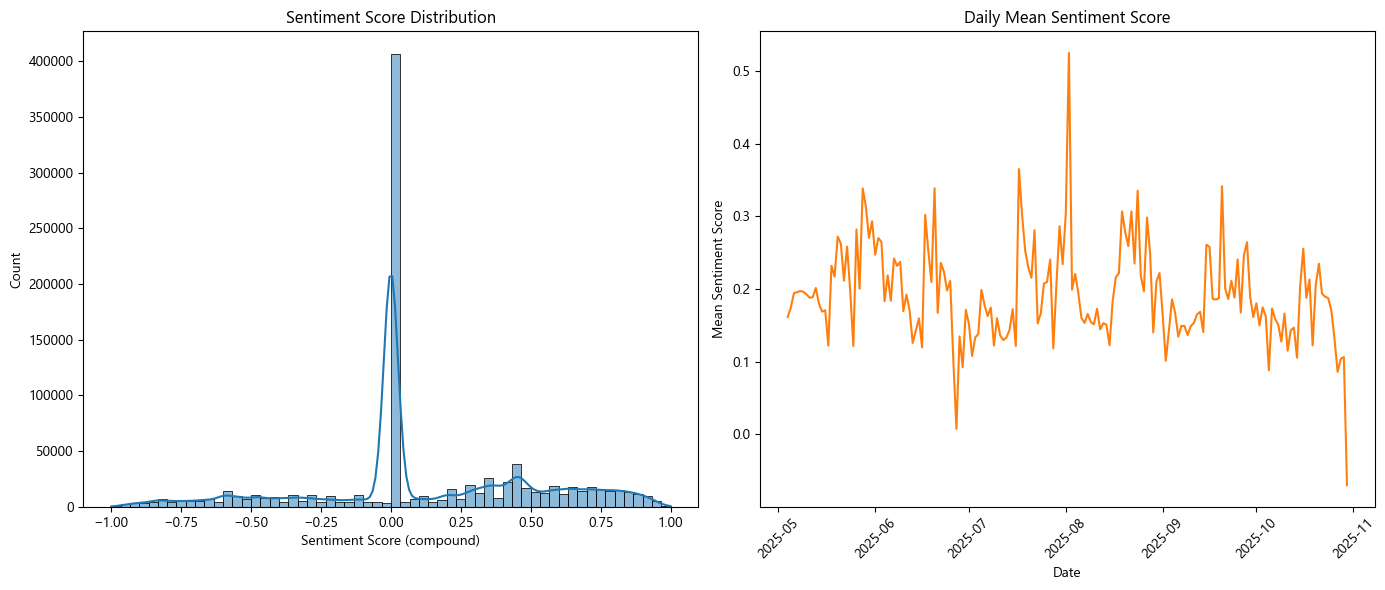

In [63]:
# Visualization for sentiment_score (uses existing `df`, `plt`, and `sns`)
# This cell creates a distribution plot and a daily mean time series.

# Ensure created_at is parsed to datetime (store in a new column to avoid overwriting)
if not pd.api.types.is_datetime64_any_dtype(df['created_at']):
    df['created_at_dt'] = pd.to_datetime(df['created_at'], errors='coerce')
else:
    df['created_at_dt'] = df['created_at']

# Prepare time series (drop rows without valid datetime)
ts = df.dropna(subset=['created_at_dt']).set_index('created_at_dt')

# Figure with two subplots: distribution and daily mean trend
plt.figure(figsize=(14,6))

# 1) Distribution (histogram + KDE)
plt.subplot(1,2,1)
sns.histplot(df['sentiment_score'], bins=60, kde=True, color='C0')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score (compound)')
plt.ylabel('Count')

# 2) Daily mean sentiment trend (show last 180 days if available)
plt.subplot(1,2,2)
daily_mean = ts['sentiment_score'].resample('D').mean().dropna()
# choose a reasonable window to visualize
if len(daily_mean) > 180:
    plot_series = daily_mean.last('180D')
else:
    plot_series = daily_mean
sns.lineplot(x=plot_series.index, y=plot_series.values, color='C1')
plt.title('Daily Mean Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('sentiment_score_analysis.png')
plt.show()

In [64]:
# the most common words in the sentiment_ready_text column
all_words = ' '.join(df['sentiment_ready_text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
print("Most Common Words:")
print(most_common_words)
for word, count in most_common_words:
    print(f"{word}: {count}")
nltk.download('vader_lexicon')


Most Common Words:
[('ai', 428646), ('chatgpt', 250469), ('openai', 178427), ('’', 167549), ('llm', 162095), ('gemini', 132916), ('de', 125617), ('que', 84620), ('com', 76802), ('like', 69421), ('face', 68226), ('google', 67884), ('e', 67388), ('deepseek', 59610), ('new', 49791), ('use', 47433), ('aí', 47368), ('“', 45477), ('1', 44086), ('”', 43591)]
ai: 428646
chatgpt: 250469
openai: 178427
’: 167549
llm: 162095
gemini: 132916
de: 125617
que: 84620
com: 76802
like: 69421
face: 68226
google: 67884
e: 67388
deepseek: 59610
new: 49791
use: 47433
aí: 47368
“: 45477
1: 44086
”: 43591


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [65]:
# the most postive posts
most_positive_posts = df.nlargest(5, 'sentiment_score')[['sentiment_ready_text', 'sentiment_score']]
print("Most Positive Posts:")
print(most_positive_posts)

# the most negative posts
most_negative_posts = df.nsmallest(5, 'sentiment_score')[['sentiment_ready_text', 'sentiment_score']]
print("Most Negative Posts:")
print(most_negative_posts)


Most Positive Posts:
                                     sentiment_ready_text  sentiment_score
377055  face tears joy face tears joy face tears joy f...           0.9998
789235  face tears joy face tears joy face tears joy f...           0.9984
899908  gemini smiling face heart eyes smiling face he...           0.9984
661766  rolling floor laughing rolling floor laughing ...           0.9968
699108  rolling floor laughing rolling floor laughing ...           0.9957
Most Negative Posts:
                                     sentiment_ready_text  sentiment_score
696268  ai jungkook eu te amo tanto loudly crying face...          -0.9999
536745  zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zz...          -0.9992
694427  eu tava jogando bola com meus amiguinhos na fr...          -0.9989
579836  loudly crying face loudly crying face loudly c...          -0.9988
692572  google ai summarizing product reviews perfect ...          -0.9983
Most Negative Posts:
                                     

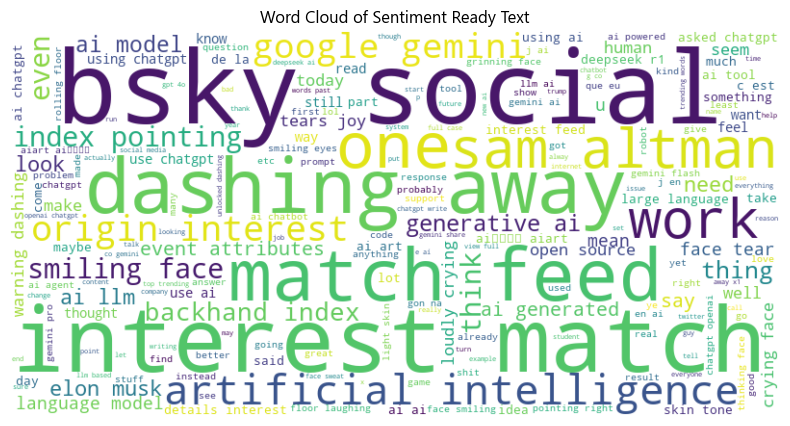

In [66]:
# generate and save a word cloud from the sentiment_ready_text column
text = ' '.join(df['sentiment_ready_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sentiment Ready Text') 
plt.savefig('word_cloud_sentiment_ready_text.png')
plt.show()


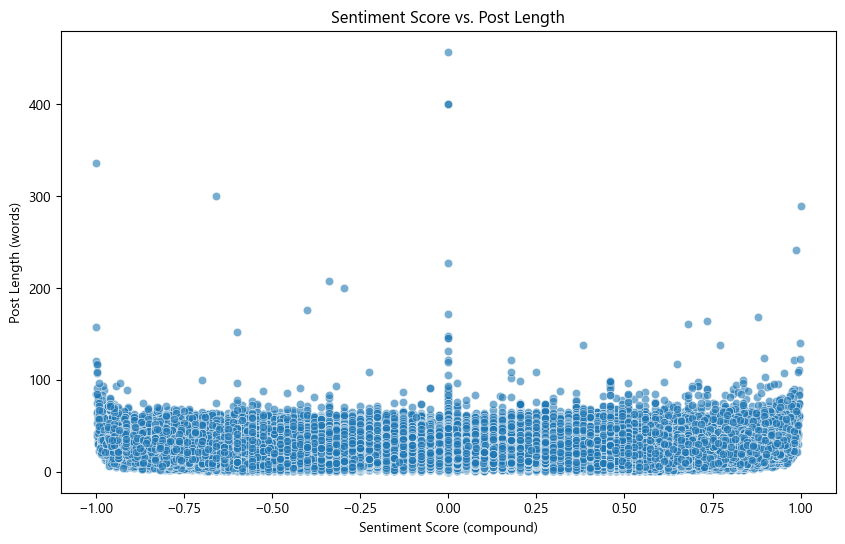

In [67]:
# generate scatter plot of sentiment score vs. post length
df['post_length'] = df['sentiment_ready_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6)) 
sns.scatterplot(data=df, x='sentiment_score', y ='post_length', alpha=0.6)
plt.title('Sentiment Score vs. Post Length')
plt.ylabel('Post Length (words)')
plt.xlabel('Sentiment Score (compound)') 
plt.savefig('sentiment_score_vs_post_length.png')
plt.show()

Top 20 most important words by TF-IDF score:
ai: 0.1293
chatgpt: 0.0964
openai: 0.0647
llm: 0.0638
gemini: 0.0630
com: 0.0294
like: 0.0285
google: 0.0273
face: 0.0268
deepseek: 0.0267
que: 0.0265
aí: 0.0236
new: 0.0205
use: 0.0200
people: 0.0166
using: 0.0157
eu: 0.0146
aiイラスト: 0.0145
news: 0.0142
think: 0.0137


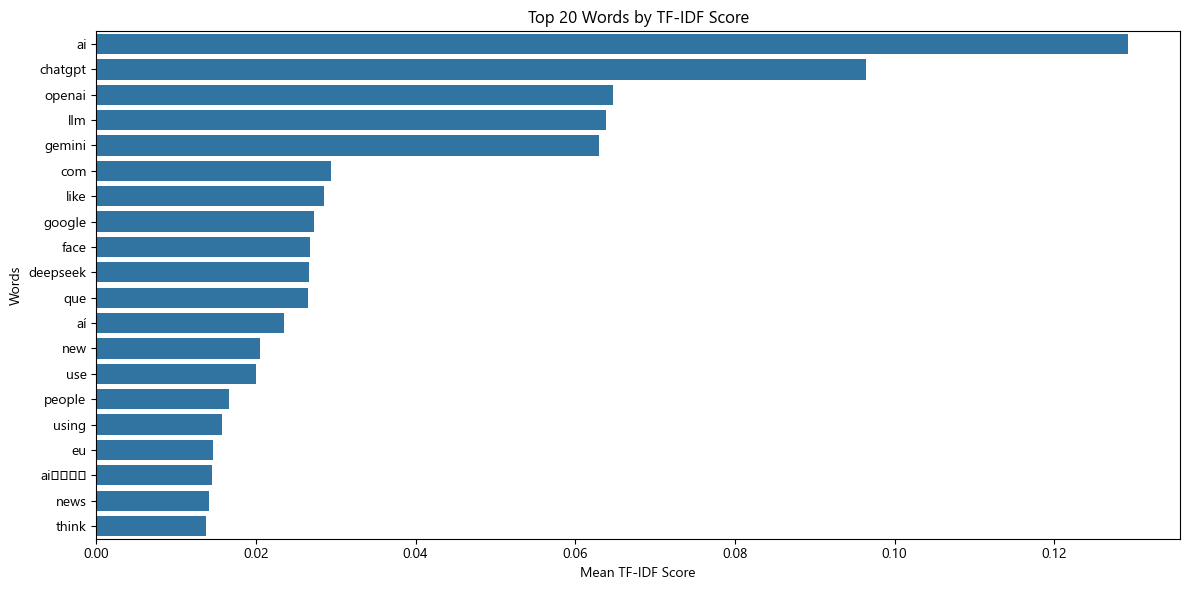

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

# Initialize TF-IDF Vectorizer
# max_features limits the vocabulary size to the most frequent words
# min_df ignores terms that appear in less than 1% of documents
# max_df ignores terms that appear in more than 95% of documents
tfidf = TfidfVectorizer(max_features=1000, min_df=0.01, max_df=0.95, stop_words='english')

# Fit and transform the cleaned text data
tfidf_matrix = tfidf.fit_transform(df['sentiment_ready_text'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Calculate mean TF-IDF score for each term
mean_tfidf = tfidf_matrix.mean(axis=0).A1

# Create a dictionary of words and their mean TF-IDF scores
word_importance = dict(zip(feature_names, mean_tfidf))

# Sort words by importance
sorted_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)

# Print top 20 most important words
print("Top 20 most important words by TF-IDF score:")
for word, score in sorted_words[:20]:
    print(f"{word}: {score:.4f}")

# Visualize top words using bar plot
plt.figure(figsize=(12, 6))
words, scores = zip(*sorted_words[:20])
sns.barplot(x=list(scores), y=list(words))
plt.title('Top 20 Words by TF-IDF Score')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Words')
plt.tight_layout()
plt.savefig('tfidf_top_words.png')
plt.show()

In [70]:
df.head()

,keyword,author,text,created_at,uri,like_count,repost_count,reply_count,author_display_name,has_embedded_media,...,average_word_length,average_sentence_length,lexical_diversity,vocabulary_size,type,cleaned_text,sentiment_ready_text,sentiment_score,created_at_dt,post_length
0,chatgpt,profcpbl.bsky.social,I've done pretty well defending myself against...,2024-11-25T03:00:03.351Z,at://did:plc:izkupspivve6uyzyvbcldoav/app.bsky...,0,0,0,C Barrington-Leigh,False,...,5.204545,14.666667,1.000000,44,post,i've done pretty well defending myself against...,done pretty well defending ecoanxiety acceptin...,0.6249,2024-11-25 03:00:03.351000+00:00,25
1,ai,alvinashcraft.com,What Does ChatGPT Mean for New Software Develo...,2024-11-22T00:38:05.262Z,at://did:plc:tdj5ie3dprhi242wsd7ykk7k/app.bsky...,0,0,0,Alvin Ashcraft,True,...,10.066667,3.400000,1.000000,15,post,what does chatgpt mean for new software develo...,chatgpt mean new software developers integerma...,0.0000,2024-11-22 00:38:05.262000+00:00,10
2,chatgpt,urologia.bsky.social,You can subscribe at\nhttps://openai.com/blog/...,2024-11-27T13:27:22.167Z,at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...,0,0,0,Ioannis Goumas Uro,False,...,10.600000,5.500000,1.000000,10,post,you can subscribe at micheletalso wroclawski_u...,subscribe micheletalso wroclawski uro dongnguy...,0.0000,2024-11-27 13:27:22.167000+00:00,7
3,ai,urologia.bsky.social,🧠💯💥\nI just tried the #chatGPT asking some ran...,2024-11-27T13:17:47.557Z,at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...,0,0,1,Ioannis Goumas Uro,True,...,6.857143,17.500000,0.971429,34,post,:brain::hundred_points::collision: i just trie...,brain hundred points collision tried chatgpt a...,0.2023,2024-11-27 13:17:47.557000+00:00,25
4,ai,john.whites.site,"A5: In the coming years, it is likely that AI ...",2024-12-06T12:27:23.653Z,at://did:plc:eha4zzrxqaezc6rxpni3dkos/app.bsky...,0,0,0,John P White,False,...,5.117647,17.000000,0.911765,31,post,"a5: in the coming years, it is likely that ai ...",a5 coming years likely ai continue play signif...,0.1779,2024-12-06 12:27:23.653000+00:00,20


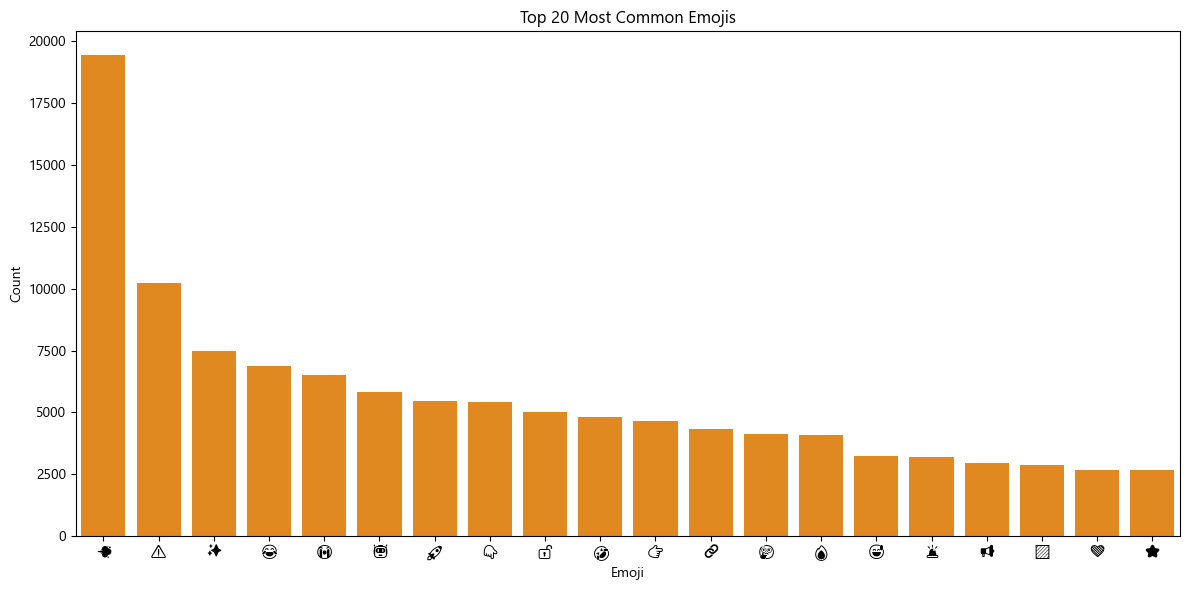

In [71]:
# Plot top 20 emojis used in the dataset

# If an 'emojis' column already exists (from other cells), reuse it; otherwise extract from df['text']
if 'emojis' not in df.columns:
    def _extract_emojis(text):
        if pd.isna(text) or not isinstance(text, str):
            return []
        res = []
        for ch in text:
            try:
                if emoji.demojize(ch) != ch:
                    if len(ch) > 0 and ch[0] != '\uFE0F':
                        res.append(ch)
            except Exception:
                continue
        return res
    df['emojis'] = df['text'].astype(str).apply(_extract_emojis)

# Aggregate and count
all_emojis = [e for sublist in df['emojis'] for e in sublist]
if len(all_emojis) == 0:
    print("No emojis found in the dataset.")
else:
    emoji_counts = Counter(all_emojis)
    top20 = emoji_counts.most_common(20)
    emojis, counts = zip(*top20)

    # Try to set an emoji-capable font if available (best-effort)
    try:
        emoji_fonts = ['Segoe UI Emoji', 'Apple Color Emoji', 'Noto Color Emoji', 'DejaVu Sans']
        found = None
        for f in emoji_fonts:
            if fm.findfont(f, fallback_to_default=True):
                found = f
                break
        if found:
            plt.rcParams['font.family'] = [found, 'sans-serif']
    except Exception:
        pass

    # Plot
    plt.figure(figsize=(12,6))
    sns.barplot(x=list(emojis), y=list(counts), color='darkorange')
    plt.title('Top 20 Most Common Emojis')
    plt.xlabel('Emoji')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('top_20_emojis.png', dpi=200, bbox_inches='tight')
    plt.show()

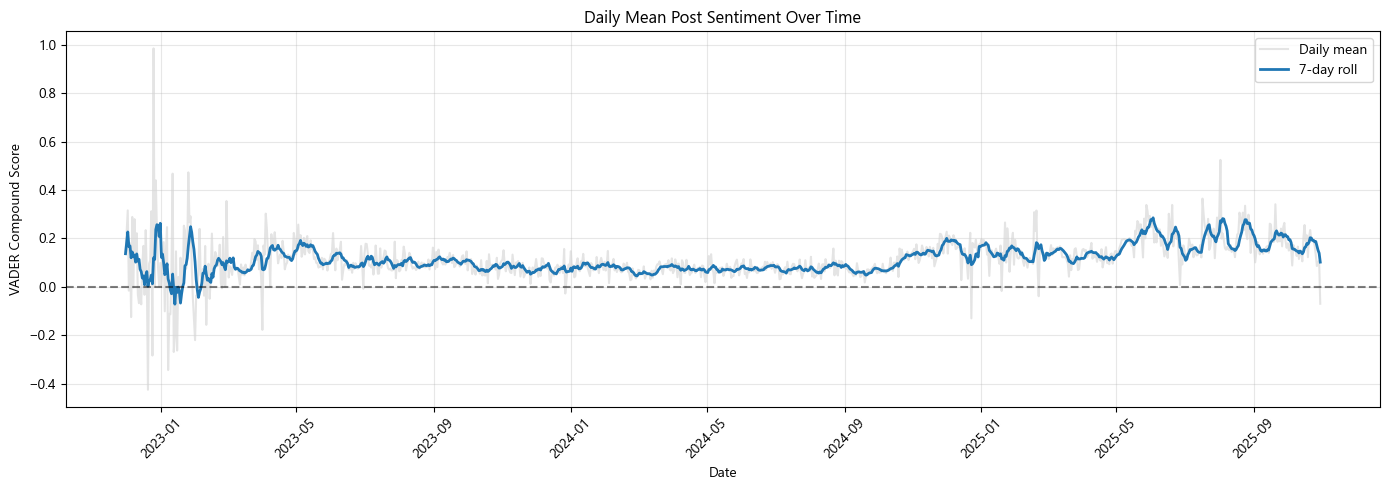

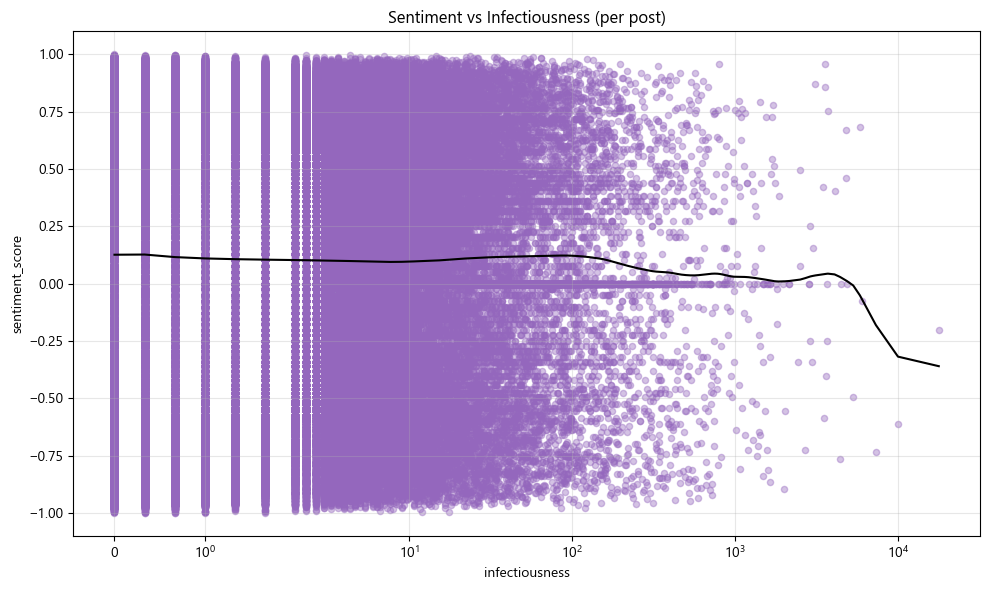

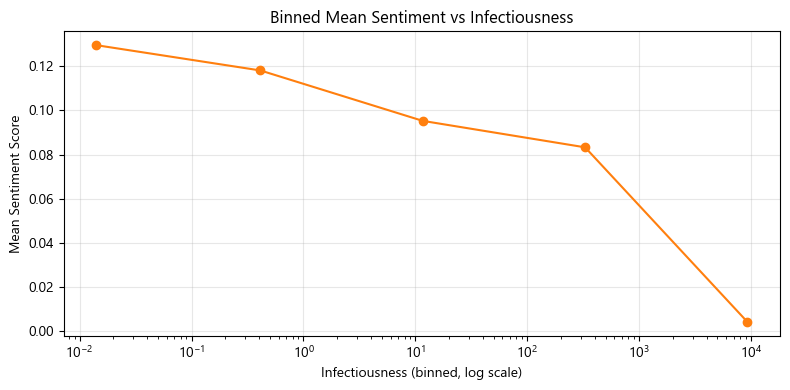

Saved: time_vs_post_sentiment_daily.png, sentiment_vs_infectiousness.png (and binned variant if available)


In [76]:
# Visualizations: 1) Time vs Post Sentiment (daily mean)  2) Sentiment vs Infectiousness
# Infectiousness is defined per-post as the average of (likes + reposts + replies).

# Ensure datetime exists
if 'created_at_dt' not in df.columns:
    if 'created_at' in df.columns:
        df['created_at_dt'] = pd.to_datetime(df['created_at'], errors='coerce')
    else:
        raise KeyError("Missing timestamp column 'created_at' in DataFrame")

# Ensure sentiment_score exists
if 'sentiment_score' not in df.columns:
    print('Calculating sentiment_score...')
    analyzer = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df['sentiment_ready_text'].apply(lambda t: analyzer.polarity_scores(str(t))['compound'])

# --- 1) Time vs Daily Mean Post Sentiment ---
# Filter to posts only (if 'type' exists and contains 'post'; else assume all are posts)
if 'type' in df.columns:
    posts_df = df[df['type'] == 'post'].copy()
else:
    posts_df = df.copy()

# Drop rows lacking datetime or sentiment
posts_ts = posts_df.dropna(subset=['created_at_dt', 'sentiment_score']).set_index('created_at_dt')
if posts_ts.empty:
    print('No post time-series data available to plot.')
else:
    daily_sent = posts_ts['sentiment_score'].resample('D').mean()
    rolling7 = daily_sent.rolling(window=7, min_periods=1).mean()

    plt.figure(figsize=(14,5))
    plt.plot(daily_sent.index, daily_sent.values, color='lightgray', alpha=0.6, label='Daily mean')
    plt.plot(rolling7.index, rolling7.values, color='tab:blue', linewidth=2, label='7-day roll')
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    plt.title('Daily Mean Post Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('VADER Compound Score')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('time_vs_post_sentiment_daily.png', dpi=300, bbox_inches='tight')
    plt.show()

# --- 2) Sentiment vs Infectiousness per post ---
# Identify candidate column names for likes/reposts/replies and fallback to 0 if missing
like_cols = ['like_count', 'likes', 'likeCount', 'num_likes']
repost_cols = ['repost_count', 'reposts', 'share_count', 'shares']
reply_cols = ['reply_count', 'replies', 'replyCount', 'num_replies']

def first_existing(col_list, df, default=0):
    for c in col_list:
        if c in df.columns:
            return df[c].fillna(0).astype(float)
    return pd.Series([default]*len(df), index=df.index)

likes = first_existing(like_cols, df)
reposts = first_existing(repost_cols, df)
replies = first_existing(reply_cols, df)

# Compute infectiousness as average of the three signals (use sum/3 to keep scale consistent)
df['infectiousness'] = (likes + reposts + replies) / 3.0

# Work on a plotting dataframe (drop rows missing sentiment or infectiousness)
plot_df = df.dropna(subset=['sentiment_score'])
plot_df = plot_df.assign(infectiousness=df['infectiousness'])
plot_df = plot_df[plot_df['infectiousness'].notna()]

if plot_df.empty:
    print('No data available for sentiment vs infectiousness plot.')
else:
    # Scatter plot (log-scale x for infectiousness because counts are skewed)
    plt.figure(figsize=(10,6))
    # Avoid log(0): add small epsilon
    eps = 1e-3
    x = plot_df['infectiousness'] + eps
    y = plot_df['sentiment_score']
    plt.scatter(x, y, alpha=0.4, s=20, color='tab:purple')
    plt.xscale('symlog' if (x.max() > 1000) else 'log')
    plt.xlabel('Infectiousness (avg of likes, reposts, replies)')
    plt.ylabel('VADER Compound Sentiment Score')
    plt.title('Sentiment vs Infectiousness (per post)')
    plt.grid(alpha=0.3)

    # Add a lowess/regression trend line using seaborn if available
    try:
        import seaborn as sns
        sns.regplot(x=x, y=y, lowess=True, scatter=False, color='black', line_kws={'linewidth':1.5})
    except Exception:
        pass

    plt.tight_layout()
    plt.savefig('sentiment_vs_infectiousness.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Additionally show binned averages to make trend clearer
    try:
        bins = np.logspace(np.log10(max(x.min(), eps)), np.log10(x.max()+eps), num=6)
        plot_df['bin'] = pd.cut(x, bins=bins, include_lowest=True)
        binned = plot_df.groupby('bin')['sentiment_score'].mean()
        bin_centers = [interval.mid for interval in binned.index]
        plt.figure(figsize=(8,4))
        plt.plot(bin_centers, binned.values, marker='o', color='tab:orange')
        plt.xscale('log')
        plt.xlabel('Infectiousness (binned, log scale)')
        plt.ylabel('Mean Sentiment Score')
        plt.title('Binned Mean Sentiment vs Infectiousness')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig('binned_sentiment_vs_infectiousness.png', dpi=300, bbox_inches='tight')
        plt.show()
    except Exception:
        # If binning fails (e.g., insufficient range), skip gracefully
        pass

print('Saved: time_vs_post_sentiment_daily.png, sentiment_vs_infectiousness.png (and binned variant if available)')

In [75]:
df.head()

,keyword,author,text,created_at,uri,like_count,repost_count,reply_count,author_display_name,has_embedded_media,...,average_sentence_length,lexical_diversity,vocabulary_size,type,cleaned_text,sentiment_ready_text,sentiment_score,created_at_dt,post_length,emojis
0,chatgpt,profcpbl.bsky.social,I've done pretty well defending myself against...,2024-11-25T03:00:03.351Z,at://did:plc:izkupspivve6uyzyvbcldoav/app.bsky...,0,0,0,C Barrington-Leigh,False,...,14.666667,1.000000,44,post,i've done pretty well defending myself against...,done pretty well defending ecoanxiety acceptin...,0.6249,2024-11-25 03:00:03.351000+00:00,25,[]
1,ai,alvinashcraft.com,What Does ChatGPT Mean for New Software Develo...,2024-11-22T00:38:05.262Z,at://did:plc:tdj5ie3dprhi242wsd7ykk7k/app.bsky...,0,0,0,Alvin Ashcraft,True,...,3.400000,1.000000,15,post,what does chatgpt mean for new software develo...,chatgpt mean new software developers integerma...,0.0000,2024-11-22 00:38:05.262000+00:00,10,[]
2,chatgpt,urologia.bsky.social,You can subscribe at\nhttps://openai.com/blog/...,2024-11-27T13:27:22.167Z,at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...,0,0,0,Ioannis Goumas Uro,False,...,5.500000,1.000000,10,post,you can subscribe at micheletalso wroclawski_u...,subscribe micheletalso wroclawski uro dongnguy...,0.0000,2024-11-27 13:27:22.167000+00:00,7,[]
3,ai,urologia.bsky.social,🧠💯💥\nI just tried the #chatGPT asking some ran...,2024-11-27T13:17:47.557Z,at://did:plc:5hmxlh2ftcakxzlpuv3qhlqu/app.bsky...,0,0,1,Ioannis Goumas Uro,True,...,17.500000,0.971429,34,post,:brain::hundred_points::collision: i just trie...,brain hundred points collision tried chatgpt a...,0.2023,2024-11-27 13:17:47.557000+00:00,25,"[🧠, 💯, 💥]"
4,ai,john.whites.site,"A5: In the coming years, it is likely that AI ...",2024-12-06T12:27:23.653Z,at://did:plc:eha4zzrxqaezc6rxpni3dkos/app.bsky...,0,0,0,John P White,False,...,17.000000,0.911765,31,post,"a5: in the coming years, it is likely that ai ...",a5 coming years likely ai continue play signif...,0.1779,2024-12-06 12:27:23.653000+00:00,20,[]
